In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [3]:
df = pd.read_csv('data/train.csv')

In [145]:
df.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


In [146]:
df.dtypes

id                              int64
titulo                         object
descripcion                    object
tipodepropiedad                object
direccion                      object
ciudad                         object
provincia                      object
antiguedad                    float64
habitaciones                  float64
garages                       float64
banos                         float64
metroscubiertos               float64
metrostotales                 float64
idzona                        float64
lat                           float64
lng                           float64
fecha                          object
gimnasio                      float64
usosmultiples                 float64
piscina                       float64
escuelascercanas              float64
centroscomercialescercanos    float64
precio                        float64
dtype: object

In [147]:
df.isnull().sum()

id                                 0
titulo                          5387
descripcion                     1619
tipodepropiedad                   46
direccion                      53072
ciudad                           372
provincia                        155
antiguedad                     43555
habitaciones                   22471
garages                        37765
banos                          26221
metroscubiertos                17400
metrostotales                  51467
idzona                         28621
lat                           123488
lng                           123488
fecha                              0
gimnasio                           0
usosmultiples                      0
piscina                            0
escuelascercanas                   0
centroscomercialescercanos         0
precio                             0
dtype: int64

# Análisis por provincia

### Cantidad de publicaciones por provincia

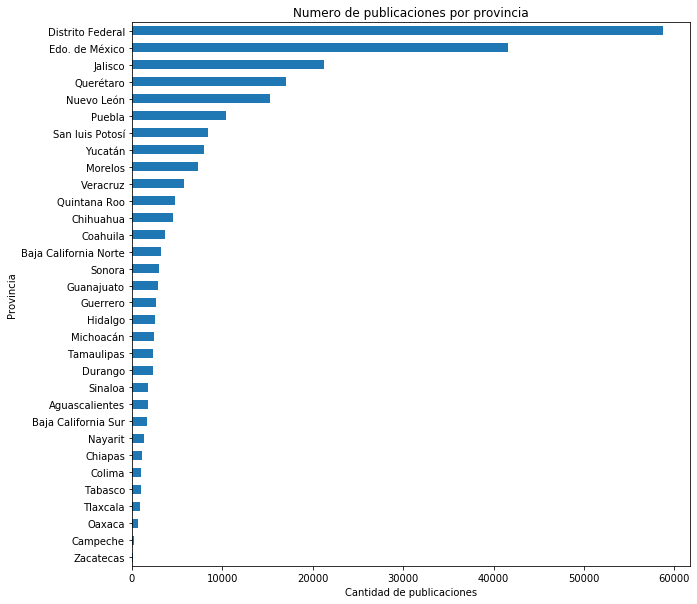

In [7]:
g = df['provincia'].value_counts().sort_values().plot(kind='barh', figsize=(10,10), title='Numero de publicaciones por provincia')
g.set_ylabel('Provincia');
g.set_xlabel('Cantidad de publicaciones')
g;

### Precio promedio por provincia

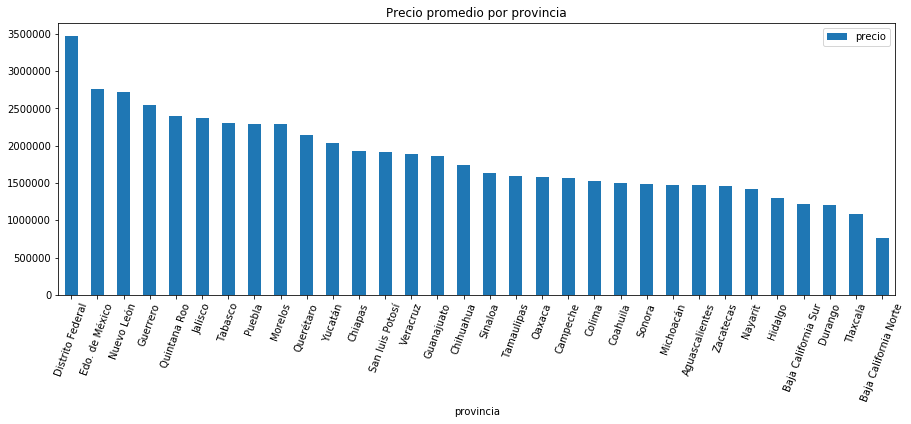

In [149]:
df.groupby('provincia').agg({'precio': 'mean'})\
    .sort_values('precio', ascending=False)\
    .plot(kind='bar', figsize=(15, 5), rot=70, title="Precio promedio por provincia");

Se observo, entre las 10 provincias mas caras, que los valores de precios estan mas dispersos a comparacion de las 10 mas baratas. 

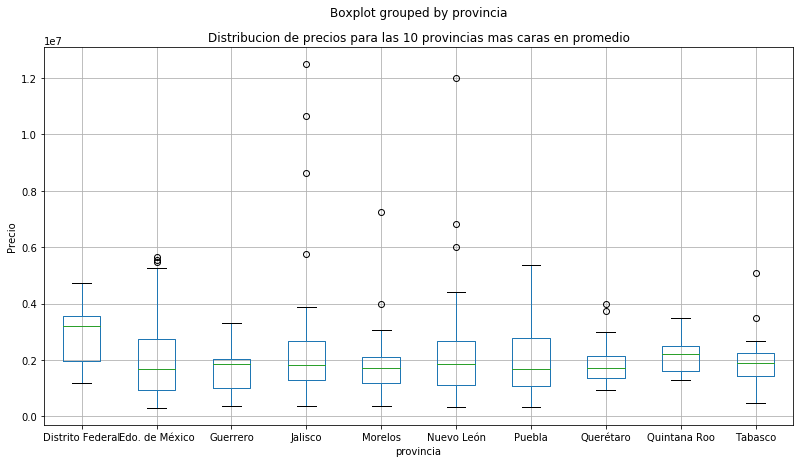

In [9]:
df_ciudades = df.groupby(['provincia','ciudad']).agg({'precio':'mean'}).reset_index().sort_values(by='precio')
df_provincias_filtro = df.groupby(['provincia']).agg({'precio':'mean'}).reset_index().sort_values(by='precio').iloc[-10:]['provincia']
df_precios_maximos = df_ciudades.merge(right=df_provincias_filtro,how='inner',left_on='provincia',right_on='provincia')
g = df_precios_maximos.boxplot(by='provincia',figsize=(13,7),column='precio')
g.set_ylabel('Precio')
g.set_title('Distribucion de precios para las 10 provincias mas caras en promedio')
g;

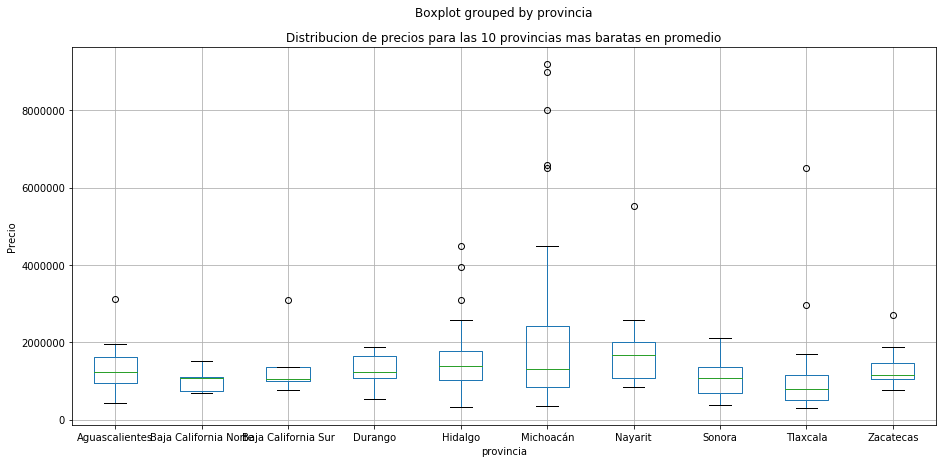

In [10]:
df_provincias_filtro_minimos = df.groupby(['provincia']).agg({'precio':'mean'}).reset_index().sort_values(by='precio').iloc[:10]['provincia']
df_precios_minimos = df_ciudades.merge(right=df_provincias_filtro_minimos,how='inner',left_on='provincia',right_on='provincia')
g = df_precios_minimos.boxplot(by='provincia',figsize=(15,7),column='precio')
g.set_title('Distribucion de precios para las 10 provincias mas baratas en promedio')
g.set_ylabel('Precio')
g;

### Precio por metro cuadrado total

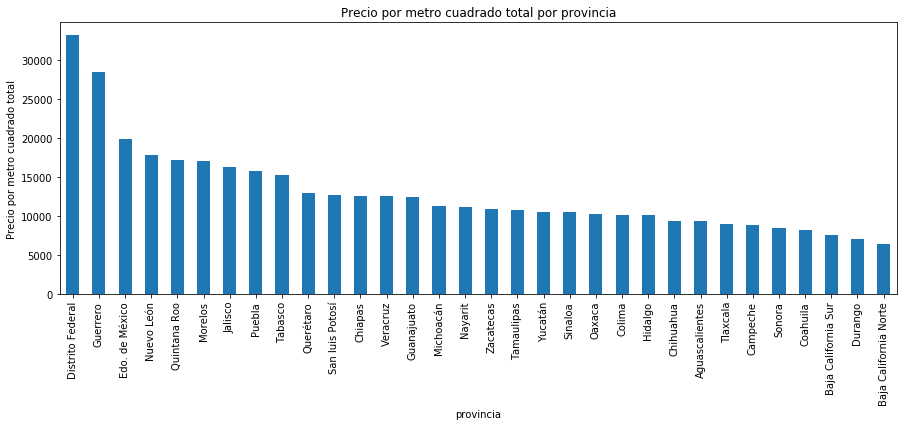

In [152]:
df_precio_por_m2 = df.groupby('provincia').agg({'precio': 'sum' , 'metrostotales' : 'sum'})
df_precio_por_m2['precio_por_m2'] = df_precio_por_m2['precio']/df_precio_por_m2['metrostotales']
df_precio_por_m2 = df_precio_por_m2.sort_values('precio_por_m2', ascending=False)
#precio por metro cuadrado total por provincia
df_precio_por_m2['precio_por_m2'].plot(kind='bar', figsize=(15,5), title='Precio por metro cuadrado total por provincia')\
.set_ylabel('Precio por metro cuadrado total');

### Precio por metro cuadrado cubierto

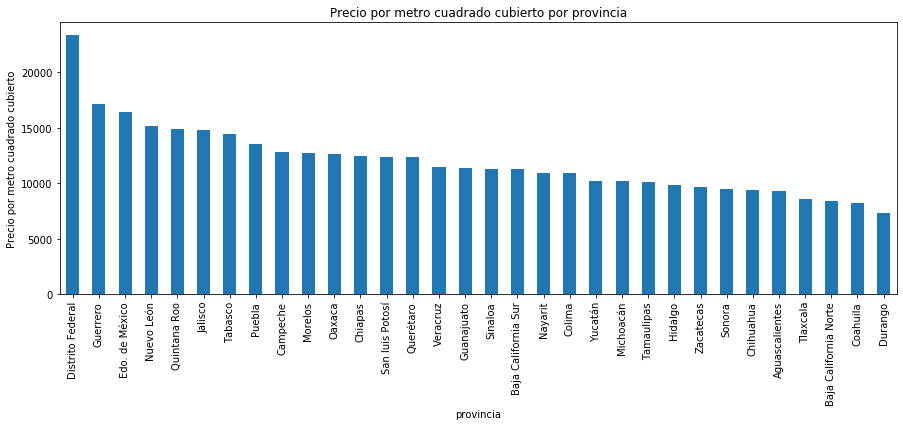

In [153]:
df_precio_por_m2 = df.groupby('provincia').agg({'precio': 'sum' , 'metroscubiertos' : 'sum'})
df_precio_por_m2['precio_por_m2'] = df_precio_por_m2['precio']/df_precio_por_m2['metroscubiertos']
df_precio_por_m2 = df_precio_por_m2.sort_values('precio_por_m2', ascending=False)
#precio por metro cuadrado cubierto por provincia
df_precio_por_m2['precio_por_m2'].plot(kind='bar', figsize=(15,5), title='Precio por metro cuadrado cubierto por provincia')\
.set_ylabel('Precio por metro cuadrado cubierto');

# Análisis según tamaño

### Número de publicaciones según el tamaño del inmueble

Se dividen las propiedades según su tamaño en 3 categorías: chico (de 15 a 156 m2), mediano (de 157 a 297 m2) y grande (de 298 a 439 m2)

In [12]:
df['tamano_del_inmueble'] = df['metrostotales']
df['tamano_del_inmueble'] = pd.cut(df['tamano_del_inmueble'], 3, labels=['chico', 'mediano', 'grande'])

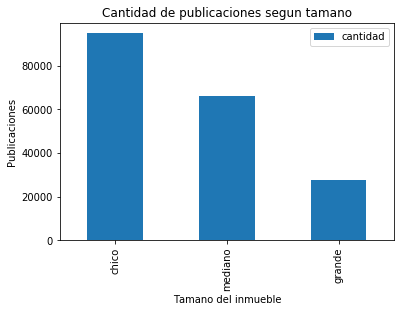

In [14]:
g = df.groupby('tamano_del_inmueble').agg({'tamano_del_inmueble':'count'})\
  .rename(columns={'tamano_del_inmueble':'cantidad'}).plot(kind='bar',title='Cantidad de publicaciones segun tamano')
g.set_xlabel('Tamano del inmueble');
g.set_ylabel('Publicaciones')
g;

### Cantidad de inmuebles y su precio promedio en relación al tamaño

In [15]:
df1 = df.groupby('tamano_del_inmueble').agg({'tamano_del_inmueble':'count'}).rename(columns={'tamano_del_inmueble':\
            'cantidad'})

In [16]:
df2 = df.groupby('tamano_del_inmueble').agg({'precio':'mean'}).rename(columns={'precio':'precio_promedio'})

In [17]:
df3 = pd.merge(df1, df2, on='tamano_del_inmueble', how='inner')

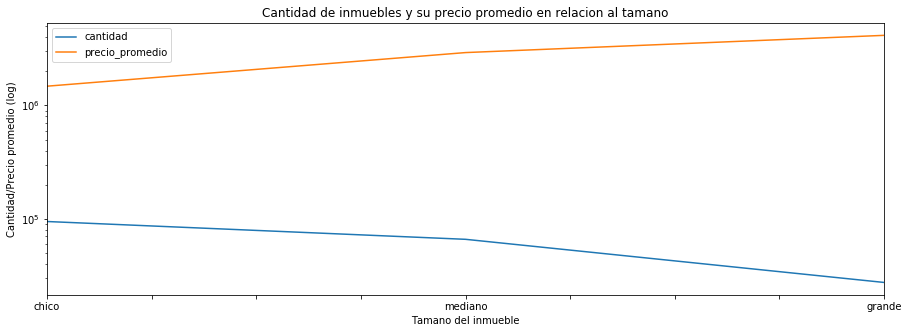

In [19]:
#cantidad de inmuebles y su precio promedio en relacion al tamaño
g = df3.plot(kind='line', figsize=(15,5), logy=True, title='Cantidad de inmuebles y su precio promedio en relacion al tamano')
g.set_ylabel('Cantidad/Precio promedio (log)')
g.set_xlabel('Tamano del inmueble')
g;

# Análisis según antigüedad

### Número de publicaciones

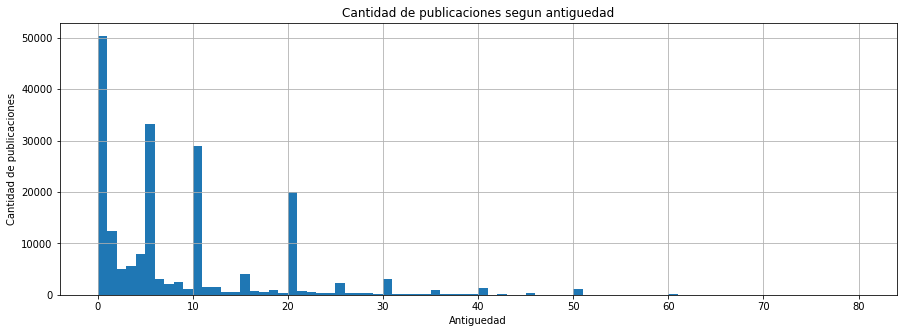

In [20]:
#cantidad de inmuebles por antiguedad
g = df['antiguedad'].hist(bins=80,figsize=(15,5));
g.set_title('Cantidad de publicaciones segun antiguedad')
g.set_ylabel('Cantidad de publicaciones')
g.set_xlabel('Antiguedad')
g;

In [21]:
df['antiguedad_cat'] = df['antiguedad']
df['antiguedad_cat'] = pd.cut(df['antiguedad_cat'], 4, labels=['entre 0 y 20', 'entre 20 y 40',\
                                                               'entre 40 y 60', 'entre 60 y 80'])

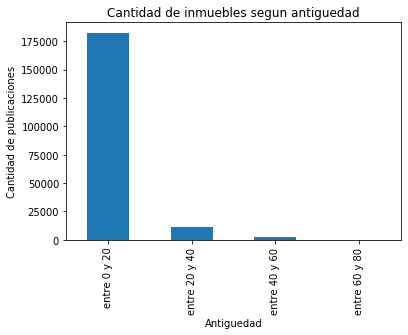

In [24]:
#cantidad de inmuebles segun antiguedad
g = df['antiguedad_cat'].value_counts().plot(kind='bar', title='Cantidad de inmuebles segun antiguedad');
g.set_ylabel('Cantidad de publicaciones')
g.set_xlabel('Antiguedad');

### Precio promedio por antigüedad

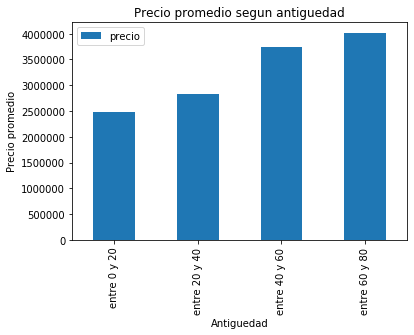

In [25]:
#precio promedio segun antiguedad
g = df.groupby('antiguedad_cat').agg({'precio':'mean'}).plot(kind='bar', title='Precio promedio segun antiguedad');
#al parecer el precio aumenta con la antiguedad
g.set_ylabel('Precio promedio')
g.set_xlabel('Antiguedad');

### Tamaño promedio por antigüedad

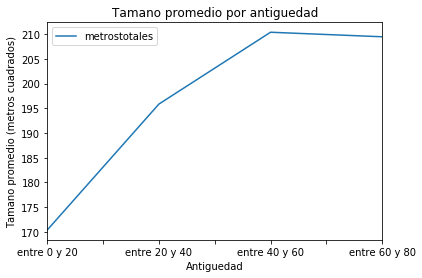

In [27]:
g = df.groupby('antiguedad_cat').agg({'metrostotales':'mean'}).plot(title='Tamano promedio por antiguedad');
#las casas mas viejas solian ser mas grandes, eso explica en parte que tambien aumente el precio con la antiguedad
#porque como vimos anteriormente, cuanto mas grande mayor precio
g.set_xlabel('Antiguedad')
g.set_ylabel('Tamano promedio (metros cuadrados)');

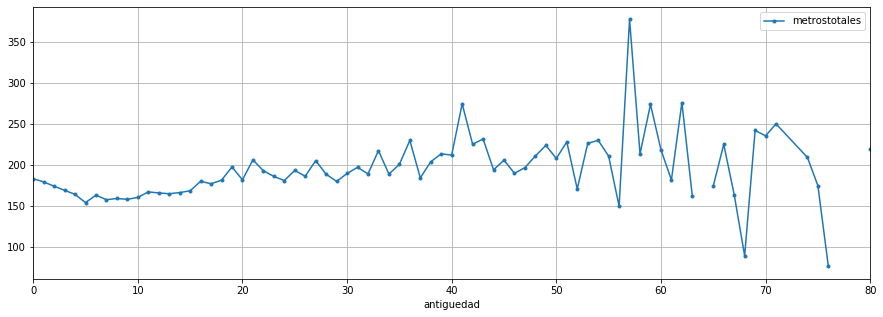

In [165]:
df.groupby('antiguedad').agg({'metrostotales':'mean'}).plot(grid=True, figsize=(15,5),style='.-');

# Análisis según tipo de propiedad

### Precio promedio por tipo de propiedad

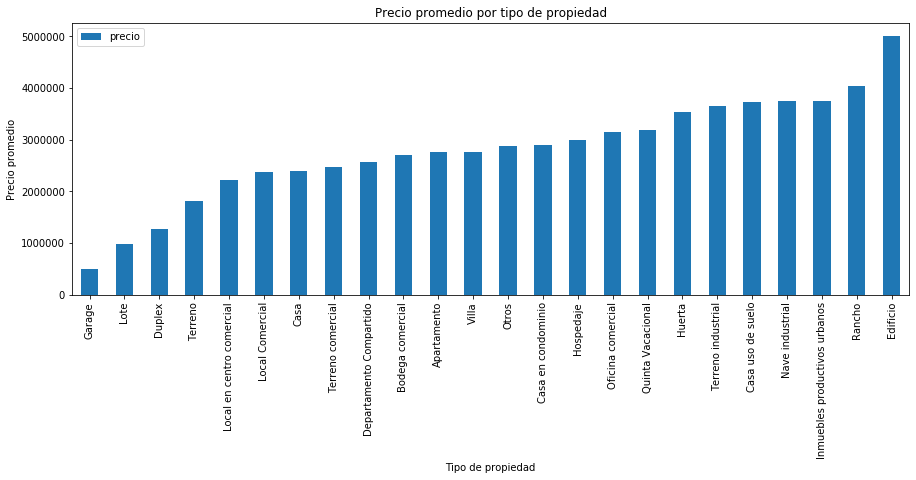

In [81]:
#precio promedio por tipo de propiedad
g = df.groupby('tipodepropiedad').agg({'precio':'mean'}).sort_values('precio').plot(kind='bar', figsize=(15,5),\
                                                                        title='Precio promedio por tipo de propiedad')
g.set_ylabel('Precio promedio')
g.set_xlabel('Tipo de propiedad');

### ¿Qué tipo de propiedad hay por provincia?

In [45]:
#tipo de propiedad por provincia
#para ver porque en ciertas provincias el m2 vale mas que en otras
#capaz tiene que ver con el tipo de propiedad que mas hay en esa prov, naturalmente un edificio vale mas que un garage
#por tamaño, amenities, etc
df4 = df.groupby(['provincia','tipodepropiedad']).agg({'tipodepropiedad':'count'}).rename(columns={'tipodepropiedad':'cant'})
df4 = df4.reset_index()

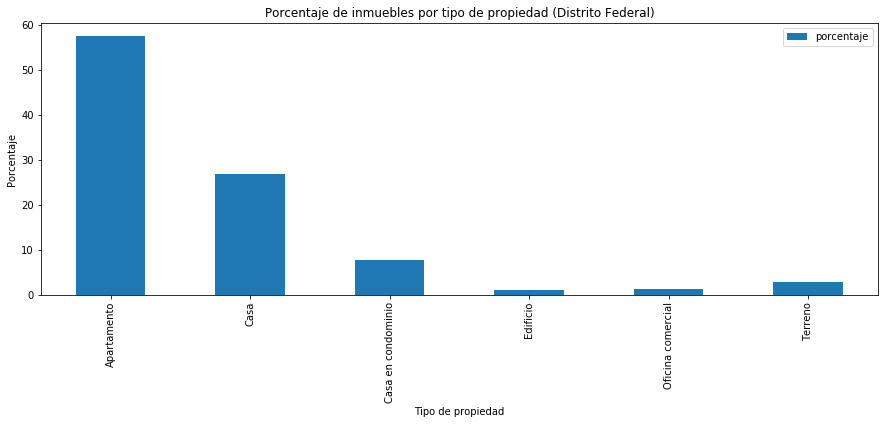

In [75]:
df5 = df4.loc[df4['provincia'] == 'Distrito Federal']
df5 = df5.set_index('tipodepropiedad')
df5['porcentaje'] = (df5['cant'] / df5['cant'].sum()) * 100
df5 = df5.loc[df5['porcentaje'] > 1]
df5 = df5.drop(columns=['cant'])
g = df5.plot(kind='bar', figsize=(15,5), title='Porcentaje de inmuebles por tipo de propiedad (Distrito Federal)')
g.set_ylabel('Porcentaje')
g.set_xlabel('Tipo de propiedad');

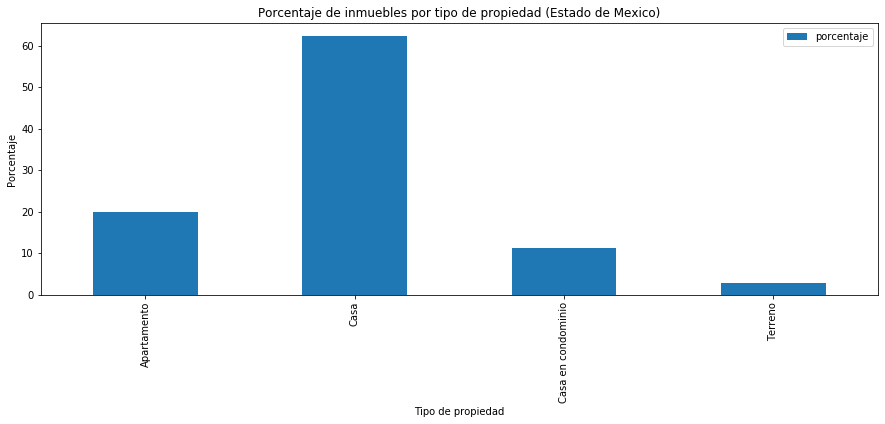

In [74]:
df5 = df4.loc[df4['provincia'] == 'Edo. de México']
df5 = df5.set_index('tipodepropiedad')
df5['porcentaje'] = (df5['cant'] / df5['cant'].sum()) * 100
df5 = df5.loc[df5['porcentaje'] > 1]
df5 = df5.drop(columns=['cant'])
g = df5.plot(kind='bar', figsize=(15,5), title='Porcentaje de inmuebles por tipo de propiedad (Estado de Mexico)')
g.set_ylabel('Porcentaje')
g.set_xlabel('Tipo de propiedad');

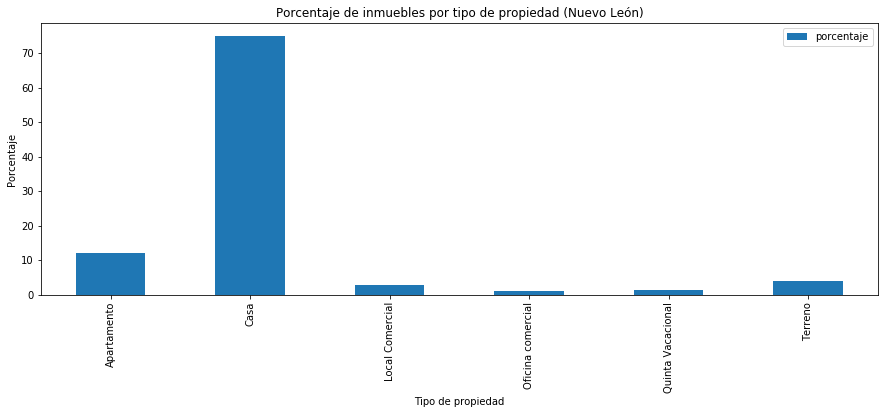

In [83]:
df5 = df4.loc[df4['provincia'] == 'Nuevo León']
df5 = df5.set_index('tipodepropiedad')
df5['porcentaje'] = (df5['cant'] / df5['cant'].sum()) * 100
df5 = df5.loc[df5['porcentaje'] > 1]
df5 = df5.drop(columns=['cant'])
g = df5.plot(kind='bar', figsize=(15,5), title='Porcentaje de inmuebles por tipo de propiedad (Nuevo León)')
g.set_ylabel('Porcentaje')
g.set_xlabel('Tipo de propiedad');

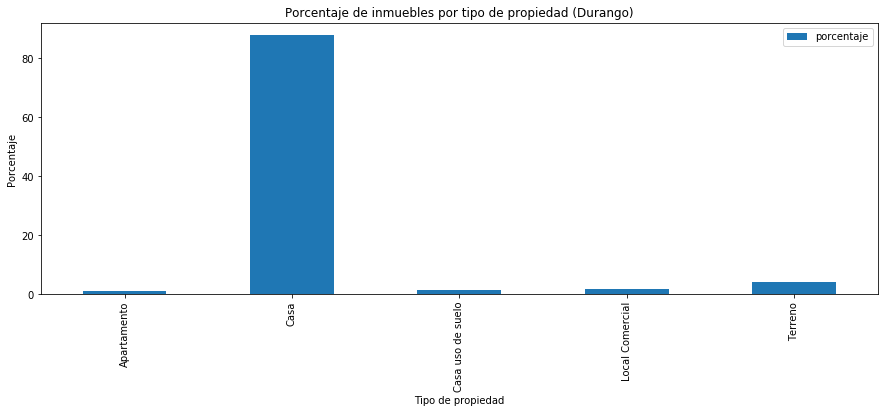

In [77]:
df5 = df4.loc[df4['provincia'] == 'Durango']
df5 = df5.set_index('tipodepropiedad')
df5['porcentaje'] = (df5['cant'] / df5['cant'].sum()) * 100
df5 = df5.loc[df5['porcentaje'] > 1]
df5 = df5.drop(columns=['cant'])
g = df5.plot(kind='bar', figsize=(15,5), title='Porcentaje de inmuebles por tipo de propiedad (Durango)')
g.set_ylabel('Porcentaje')
g.set_xlabel('Tipo de propiedad');

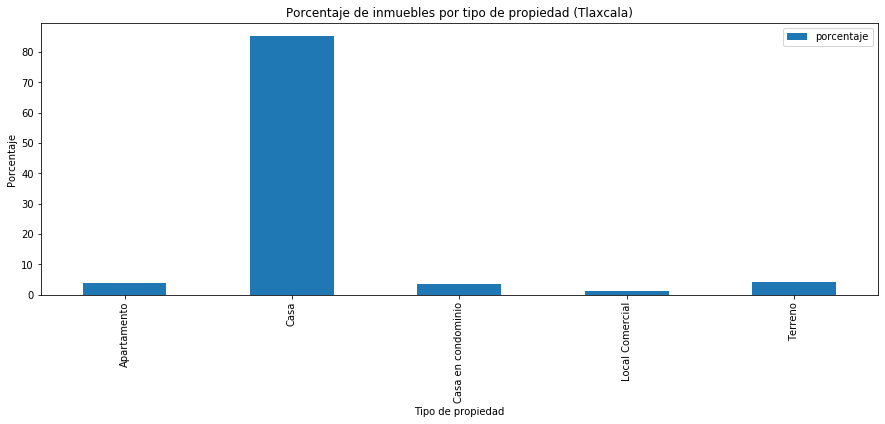

In [78]:
df5 = df4.loc[df4['provincia'] == 'Tlaxcala']
df5 = df5.set_index('tipodepropiedad')
df5['porcentaje'] = (df5['cant'] / df5['cant'].sum()) * 100
df5 = df5.loc[df5['porcentaje'] > 1]
df5 = df5.drop(columns=['cant'])
g = df5.plot(kind='bar', figsize=(15,5), title='Porcentaje de inmuebles por tipo de propiedad (Tlaxcala)')
g.set_ylabel('Porcentaje')
g.set_xlabel('Tipo de propiedad');

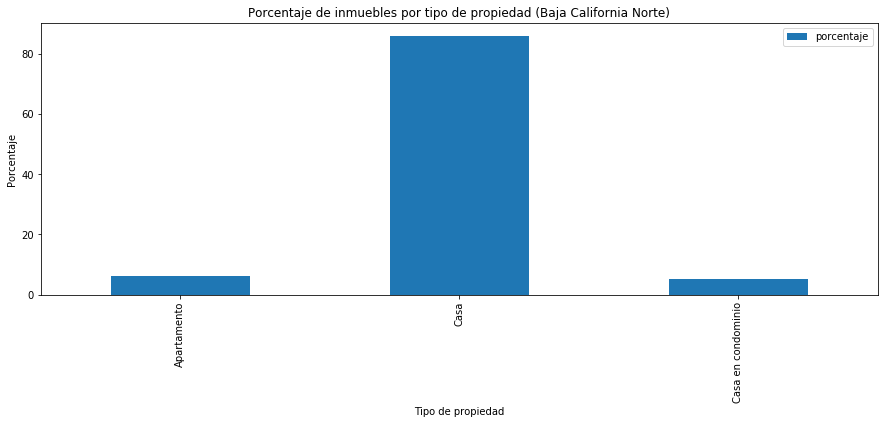

In [82]:
df5 = df4.loc[df4['provincia'] == 'Baja California Norte']
df5 = df5.set_index('tipodepropiedad')
df5['porcentaje'] = (df5['cant'] / df5['cant'].sum()) * 100
df5 = df5.loc[df5['porcentaje'] > 1]
df5 = df5.drop(columns=['cant'])
g = df5.plot(kind='bar', figsize=(15,5), title='Porcentaje de inmuebles por tipo de propiedad (Baja California Norte)')
g.set_ylabel('Porcentaje')
g.set_xlabel('Tipo de propiedad');

# Análisis según características

### Cantidad de inmuebles y precio promedio según cantidad de garages

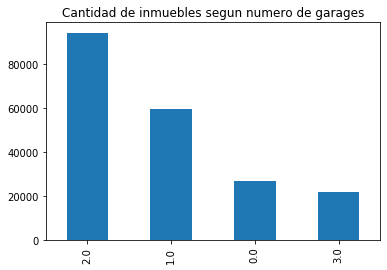

In [170]:
df['garages'].value_counts().plot(kind='bar', title='Cantidad de inmuebles segun numero de garages');

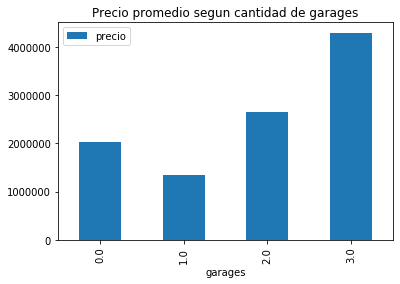

In [171]:
#precio promedio por cantidad de garages
df.groupby('garages').agg({'precio':'mean'}).plot(kind='bar', title='Precio promedio segun cantidad de garages');

### Cantidad de inmuebles y precio promedio según cantidad de habitaciones

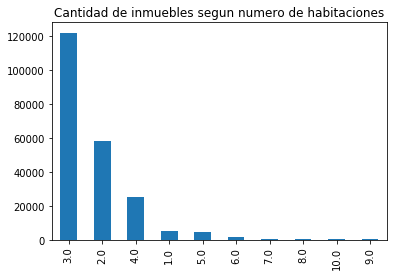

In [172]:
df['habitaciones'].value_counts().plot(kind='bar', title='Cantidad de inmuebles segun numero de habitaciones');

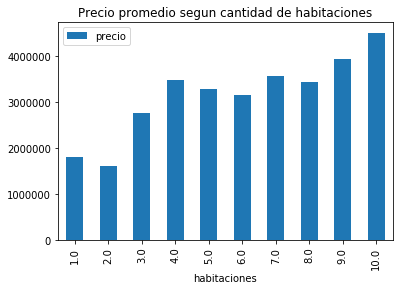

In [173]:
#precio promedio por cantidad de habitaciones
df.groupby('habitaciones').agg({'precio':'mean'}).plot(kind='bar', title='Precio promedio segun cantidad de habitaciones');

### Cantidad de inmuebles y precio promedio según cantidad de baños

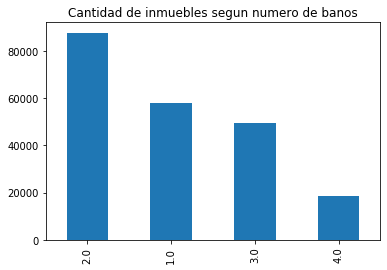

In [174]:
df['banos'].value_counts().plot(kind='bar', title='Cantidad de inmuebles segun numero de banos');

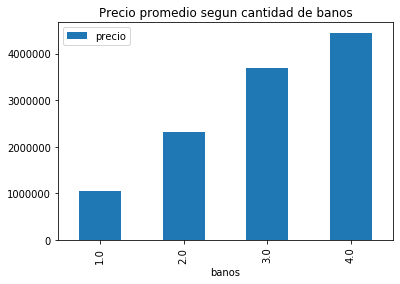

In [175]:
#precio promedio por cantidad de baños
df.groupby('banos').agg({'precio':'mean'}).plot(kind='bar', title='Precio promedio segun cantidad de banos');

### Cantidad de inmuebles y precio promedio por número de amenities

In [176]:
df['cant_amenities'] = df['gimnasio'] + df['usosmultiples'] + df['piscina']

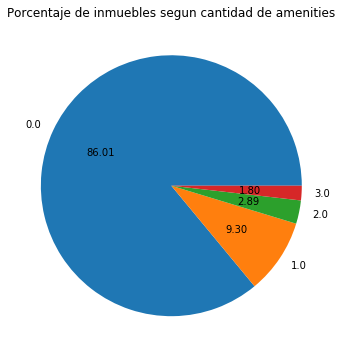

In [177]:
#porcentaje de inmuebles segun cantidad de amenities
df['cant_amenities'].value_counts()\
.plot.pie(figsize=(6,6), autopct='%.2f', title='Porcentaje de inmuebles segun cantidad de amenities')\
.set_ylabel('');

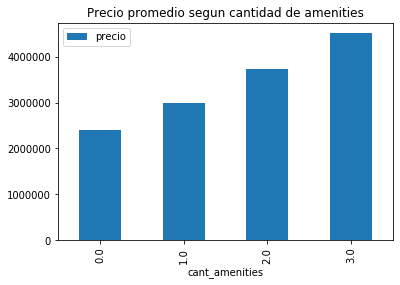

In [178]:
#promedio de precio segun cantidad de amenities
df.groupby('cant_amenities').agg({'precio' : 'mean'}).plot(kind='bar', title='Precio promedio segun cantidad de amenities');

### Cantidad de inmuebles y precio promedio según sus cercanías 

In [179]:
df['centroscomercialescercanos'] = df['centroscomercialescercanos'].map({1:2, 0:0})
df['cercanias'] = df['escuelascercanas'] + df['centroscomercialescercanos']
d = {0 : 'lejos de todo', 1 : 'cerca de escuela unicamente', 2 : 'cerca de centro comercial unicamente', \
    3 : 'cerca de ambos'}

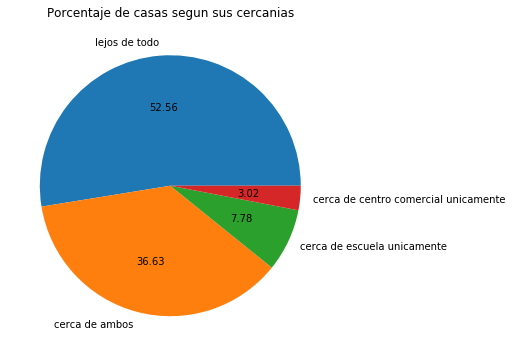

In [180]:
#porcentaje de casas segun sus cercanias
df['cercanias'] = df['cercanias'].map(d)
df['cercanias'].value_counts()\
.plot.pie(figsize=(6,6), autopct='%.2f', title='Porcentaje de casas segun sus cercanias')\
.set_ylabel('');

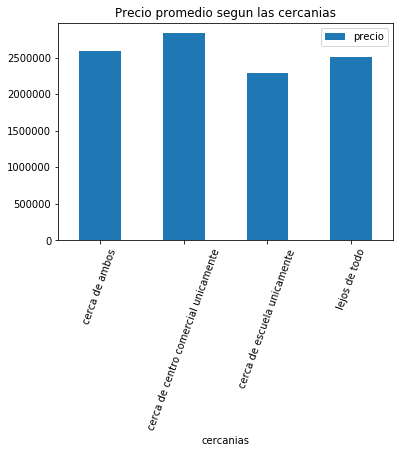

In [181]:
#precio promedio segun sus cercanias
#las que menos valen en promedio son las que estan cerca de escuelas (sera por el ruido?)
df.groupby('cercanias').agg({'precio':'mean'}).plot(kind='bar', rot=70, title='Precio promedio segun las cercanias');

Pareciera que las casas que están cerca de escuelas son las que en promedio menos valen, por eso a continuación se las compara con los otros tipos de casas para ver si tienen características desfavorables que las hagan valer menos

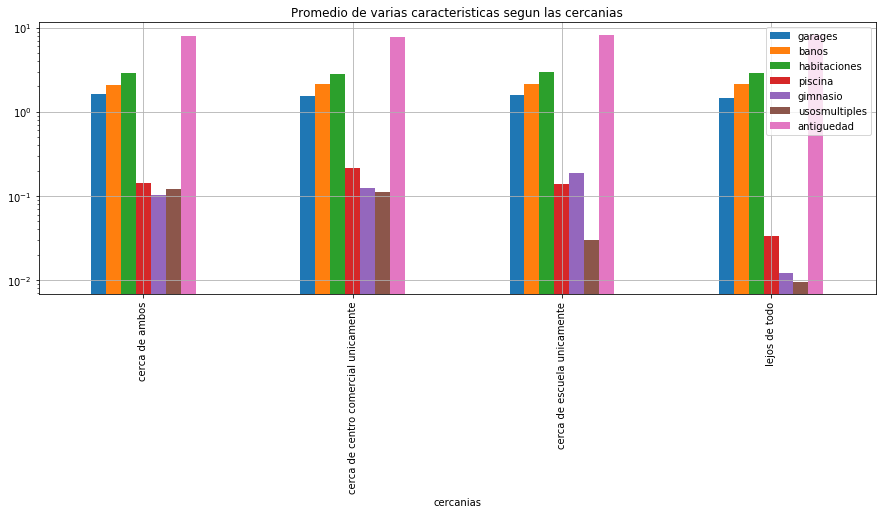

In [182]:
df.groupby('cercanias').agg({'garages':'mean', 'banos':'mean', \
                            'habitaciones':'mean', 'piscina':'mean', 'gimnasio':'mean', 'usosmultiples':'mean', \
                            'antiguedad':'mean'}).plot(kind='bar', logy=True, figsize=(15,5), grid=True, \
                            title='Promedio de varias caracteristicas segun las cercanias');

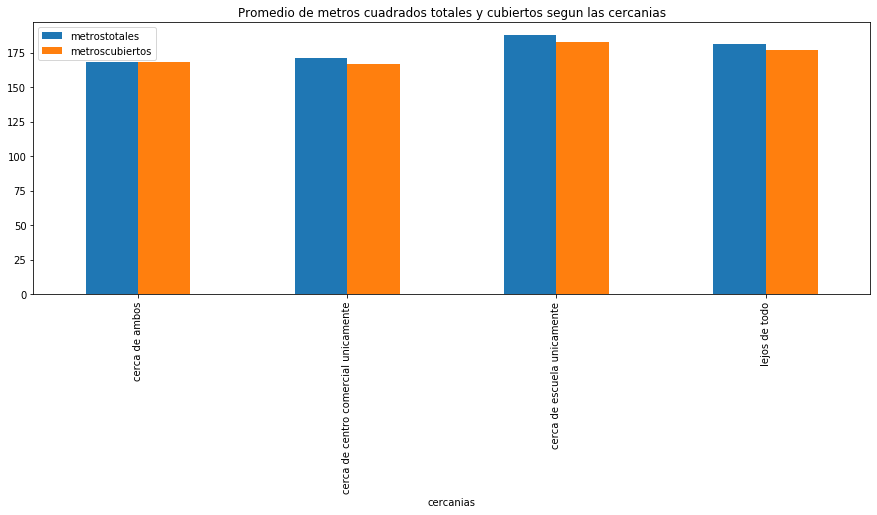

In [183]:
df.groupby('cercanias').agg({'metrostotales':'mean', 'metroscubiertos':'mean'})\
.plot(kind='bar', figsize=(15,5), title='Promedio de metros cuadrados totales y cubiertos segun las cercanias');

Incluso se ve que en promedio las casas cercanas a escuelas son las mas grandes

A continuación se trata de ver cual es el tipo de propiedad que más hay para las casas que están lejos de todo y para las que están cerca de escuelas únicamente (se tomó aquellos tipos de propiedad cuyo porcentaje sea mayor a 0.5)

In [184]:
df_cercanias_tipo = df.groupby(['cercanias','tipodepropiedad']).agg({'tipodepropiedad':'count'}).\
rename(columns={'tipodepropiedad':'cantidad'}).reset_index()

In [185]:
df_lejos_de_todo = df_cercanias_tipo.loc[df_cercanias_tipo['cercanias'] == 'lejos de todo'].copy()

In [186]:
df_lejos_de_todo['porcentaje'] = df_lejos_de_todo['cantidad'] * 100 / df_lejos_de_todo['cantidad'].sum()

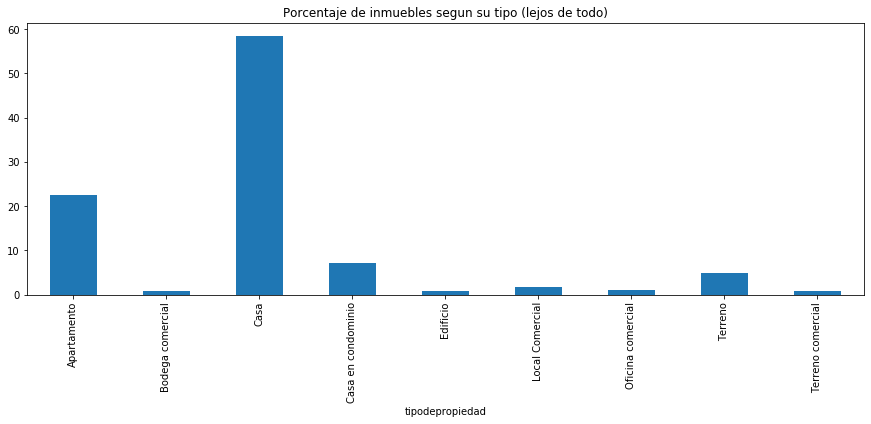

In [187]:
df_lejos_de_todo = df_lejos_de_todo.set_index('tipodepropiedad')
df_lejos_de_todo = df_lejos_de_todo.loc[df_lejos_de_todo['porcentaje'] > 0.5]
df_lejos_de_todo['porcentaje'].plot(kind='bar', figsize=(15,5), title='Porcentaje de inmuebles segun su tipo (lejos de todo)');

In [188]:
df_solo_escuela = df_cercanias_tipo.loc[df_cercanias_tipo['cercanias'] == 'cerca de escuela unicamente'].copy()

In [189]:
df_solo_escuela['porcentaje'] = df_solo_escuela['cantidad'] * 100 / df_solo_escuela['cantidad'].sum()
df_solo_escuela

,cercanias,tipodepropiedad,cantidad,porcentaje
35,cerca de escuela unicamente,Apartamento,2975,15.926977
36,cerca de escuela unicamente,Bodega comercial,33,0.176669
37,cerca de escuela unicamente,Casa,13299,71.197602
38,cerca de escuela unicamente,Casa en condominio,1319,7.061406
39,cerca de escuela unicamente,Casa uso de suelo,33,0.176669
40,cerca de escuela unicamente,Departamento Compartido,6,0.032122
41,cerca de escuela unicamente,Duplex,1,0.005354
42,cerca de escuela unicamente,Edificio,50,0.267680
43,cerca de escuela unicamente,Inmuebles productivos urbanos,16,0.085658
44,cerca de escuela unicamente,Local Comercial,119,0.637079


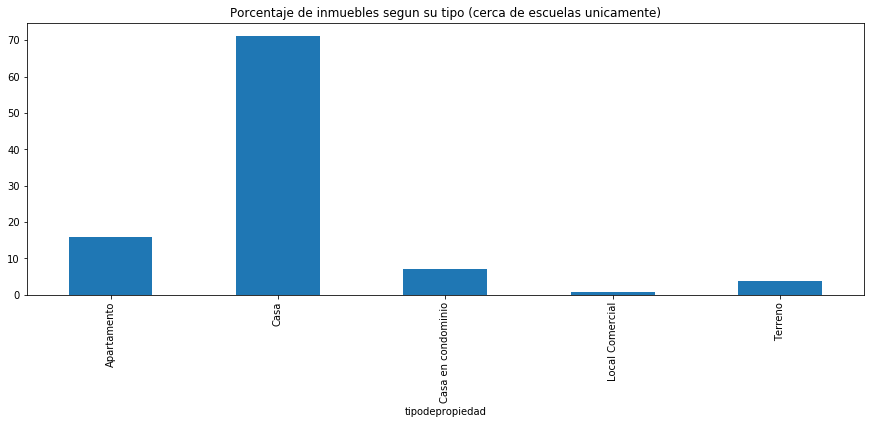

In [190]:
df_solo_escuela = df_solo_escuela.set_index('tipodepropiedad')
df_solo_escuela = df_solo_escuela.loc[df_solo_escuela['porcentaje'] > 0.5]
df_solo_escuela['porcentaje'].plot(kind='bar', figsize=(15,5), title='Porcentaje de inmuebles segun su tipo (cerca de escuelas unicamente)');

Casi el 70% de los que estan cerca de escuelas son casas, que como se vio antes, en promedio no tienen un precio elevado, comparando con otros tipos como los apartamentos.

In [191]:
#extraigo el anio de la fecha de cada registro
df['_fecha'] = pd.to_datetime(df['fecha'])
df['anio_publicacion'] = df['_fecha'].dt.year
df['mes_publicacion'] = df['_fecha'].dt.month
df['count'] = 1

In [192]:
#agrupo por provincia, anio publicacion y cuento las publicaciones
df['cantidad'] = 1 
df2 = df.groupby(['anio_publicacion','provincia'])\
.agg({'cantidad':'count'}).reset_index()
df2 = df2.sort_values(by=['anio_publicacion','cantidad'],ascending=False)

In [193]:
#defino la funcion obtener_maximos para poder procesar una lista ordenada por anio y cantidad de publicaciones.
#Esencialmente hace un ranking por anio y cantidad, para luego poder aplicar algun filtro y eliminar todos los datos que no caen dentro del top N
#este metodo probablemente sea impracticable en masas muy grandes de datos...
valor_externo='0' #variable que se va a usar para recorrer los anios
contador_externo=0 #contador que se va a usar para ver si se paso cierto limite.

def obtener_maximos(valor,limite):
    global valor_externo
    global contador_externo
    if valor!=valor_externo:
        valor_externo = valor
        contador_externo = limite
    else:    
        if contador_externo == 0:
            contador_externo = 0
        else:
            contador_externo = contador_externo - 1
    return contador_externo

In [194]:
valor_externo='0' #variable que se va a usar para recorrer los anios
contador_externo=0 #contador que se va a usar para ver si se paso cierto limite.
df2['rank'] = df2['anio_publicacion'].map(lambda x: obtener_maximos(x,6))

In [195]:
df_ranking_provincias = df2.loc[df2['rank'] > 0].sort_values(by=['anio_publicacion','cantidad'],ascending=True)
df_ranking_provincias = df_ranking_provincias.set_index(['anio_publicacion','provincia'])

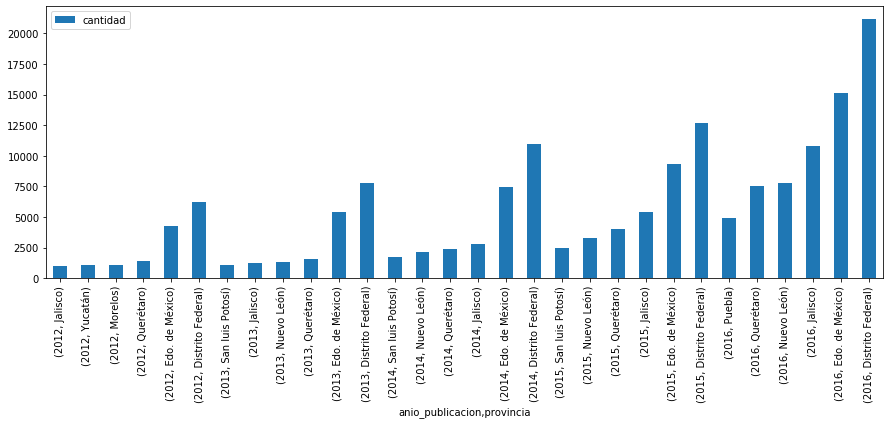

In [196]:
#se observa que las provincias que mas generan publicaciones se mantuvieron relativamente estables en el tiempo
df_ranking_provincias.plot(kind='bar',  figsize=(15,5),y='cantidad');

In [197]:
df_mapa = df.loc[df['lat'].notnull()]
df_mapa = df_mapa.loc[df['lat'] > 14.40 ]
df_mapa = df_mapa.loc[df['lat'] < 32.80 ]
df_mapa = df_mapa.loc[df['lng'] < -86.50 ]
df_mapa = df_mapa.loc[df['lng'] > -117.50 ]

In [198]:
df_mapa[{'lat','lng'}].head()

,lat,lng
1,19.310205,-99.227655
3,19.301890,-99.688015
5,19.300612,-99.148475
6,17.143504,-96.803504
7,20.672612,-87.037968


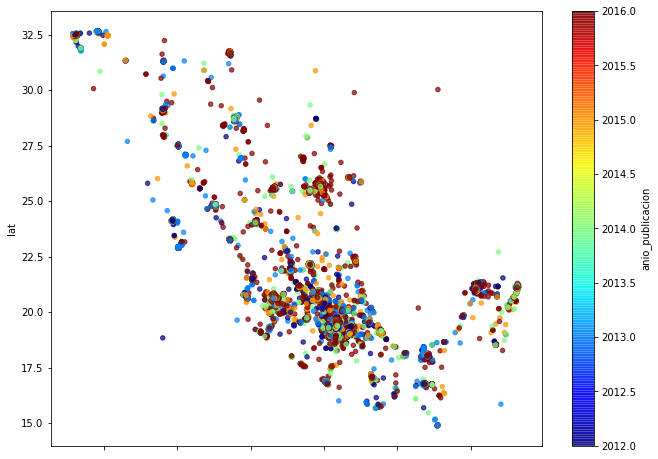

In [199]:
df_mapa.plot(kind='scatter',x='lng',y='lat',colormap='jet',c='anio_publicacion',figsize=(11,8),alpha=0.7)

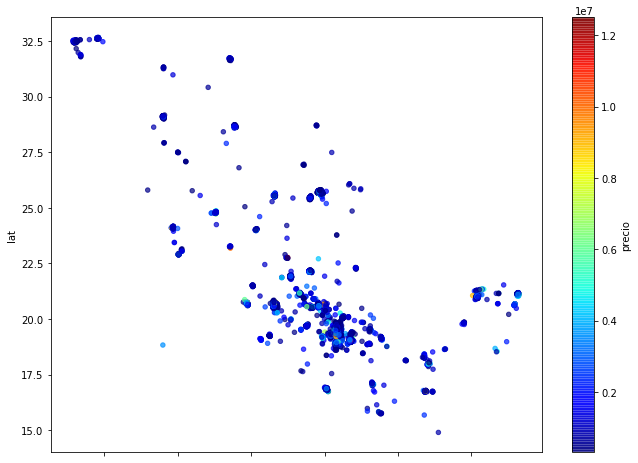

In [200]:
df_mapa.loc[df_mapa['anio_publicacion'] == 2012].plot(kind='scatter',x='lng',y='lat',colormap='jet',c='precio',figsize=(11,8),alpha=0.7)

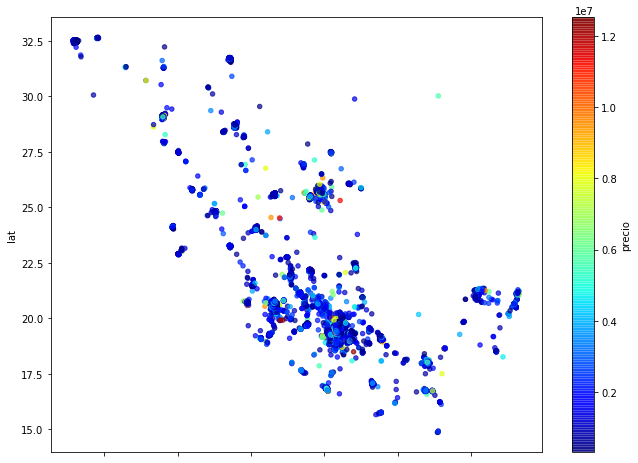

In [201]:
df_mapa.loc[df_mapa['anio_publicacion'] == 2016].plot(kind='scatter',x='lng',y='lat',colormap='jet',c='precio',figsize=(11,8),alpha=0.7)

In [202]:
#sns.jointplot(x="lng", y="lat", data=df_mapa[{'lng','lat','precio'}], kind="hex");

### Evolucion de precios por anio de publicacion

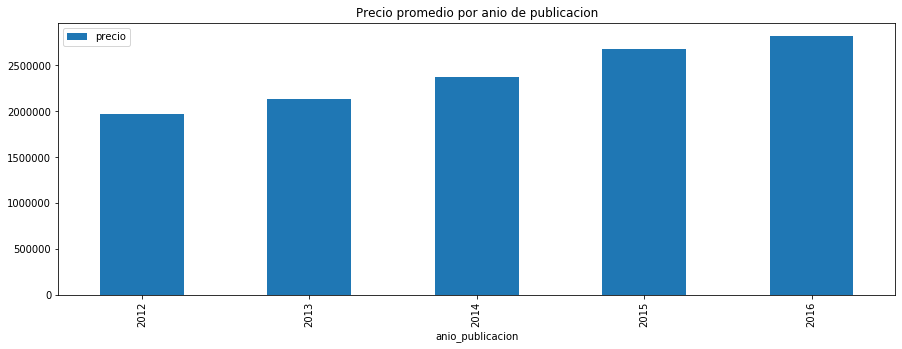

In [203]:

df_mapa.groupby('anio_publicacion').agg({'precio':'mean'}).sort_values('precio').plot(kind='bar', figsize=(15,5),\
                                                                        title='Precio promedio por anio de publicacion');

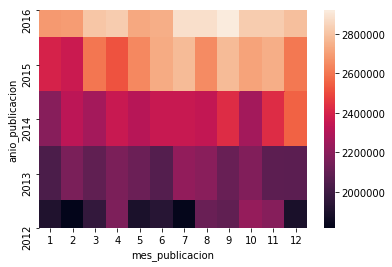

In [204]:
#precio promedio por mes a traves de los años
df_agrupado = df.loc[:,'precio':'count']
df_agrupado = df.groupby(['anio_publicacion','mes_publicacion']).agg({'precio':'mean'})
df_agrupado = df_agrupado.reset_index()
df_agrupado = df_agrupado.pivot(index = 'anio_publicacion', columns = 'mes_publicacion', values = 'precio')

mapita = sns.heatmap(df_agrupado.sort_index(ascending=False))

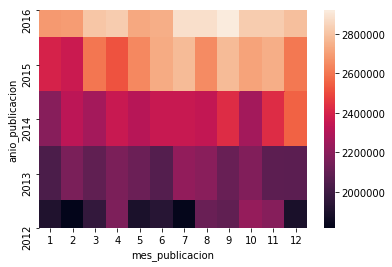

In [205]:
#precio promedio por mes a traves de los años
df_agrupado = df.groupby(['anio_publicacion','mes_publicacion']).agg({'precio':'mean'})
df_agrupado = df_agrupado.reset_index()
df_agrupado = df_agrupado.pivot(index = 'anio_publicacion', columns = 'mes_publicacion', values = 'precio')

mapita = sns.heatmap(df_agrupado.sort_index(ascending=False))

In [206]:
#20 ciudades mas caras y mas baratas

df_ciudades = df.groupby(['provincia','ciudad']).agg({'precio':'mean'}).reset_index().sort_values(by='precio')
ciudades_mas_caras = df_ciudades.iloc[-20:]
ciudades_mas_baratas = df_ciudades.iloc[:20]

#ciudades_mas_caras.join(ciudades_mas_baratas.set_index('provincia'), on='provincia', how='inner')
#alguna idea de como representar esto? lo hacemos con el grafico de barras del precio promedio por provincia?
#puebla tiene varias de las ciudades mas baratas y aun asi en el precio por provincia esta entre las mas caras, es un dato interesante(?)
print(ciudades_mas_caras)
print()
print(ciudades_mas_baratas)

      provincia                  ciudad        precio
328     Jalisco                   Ameca  5.745000e+06
502  Nuevo León            Los Herreras  6.000000e+06
847     Yucatán                Buctzotz  6.000000e+06
873     Yucatán                  Sudzal  6.000000e+06
789    Veracruz                  Comapa  6.500000e+06
416   Michoacán              PuruAndiro  6.500000e+06
751    Tlaxcala     San Pablo del Monte  6.500000e+06
395   Michoacán                 Cuitzeo  6.585642e+06
513  Nuevo León  San Pedro Garza García  6.814673e+06
467     Morelos               Zacualpan  7.260000e+06
885     Yucatán                Tzucacab  7.800000e+06
415   Michoacán                 Peribán  8.000000e+06
887     Yucatán                     Ucú  8.500000e+06
331     Jalisco                  Atengo  8.635200e+06
426   Michoacán            Tepalcatepec  9.000000e+06
393   Michoacán                Contepec  9.200000e+06
383     Jalisco       ácatlán de Juárez  1.065140e+07
495  Nuevo León           Gr

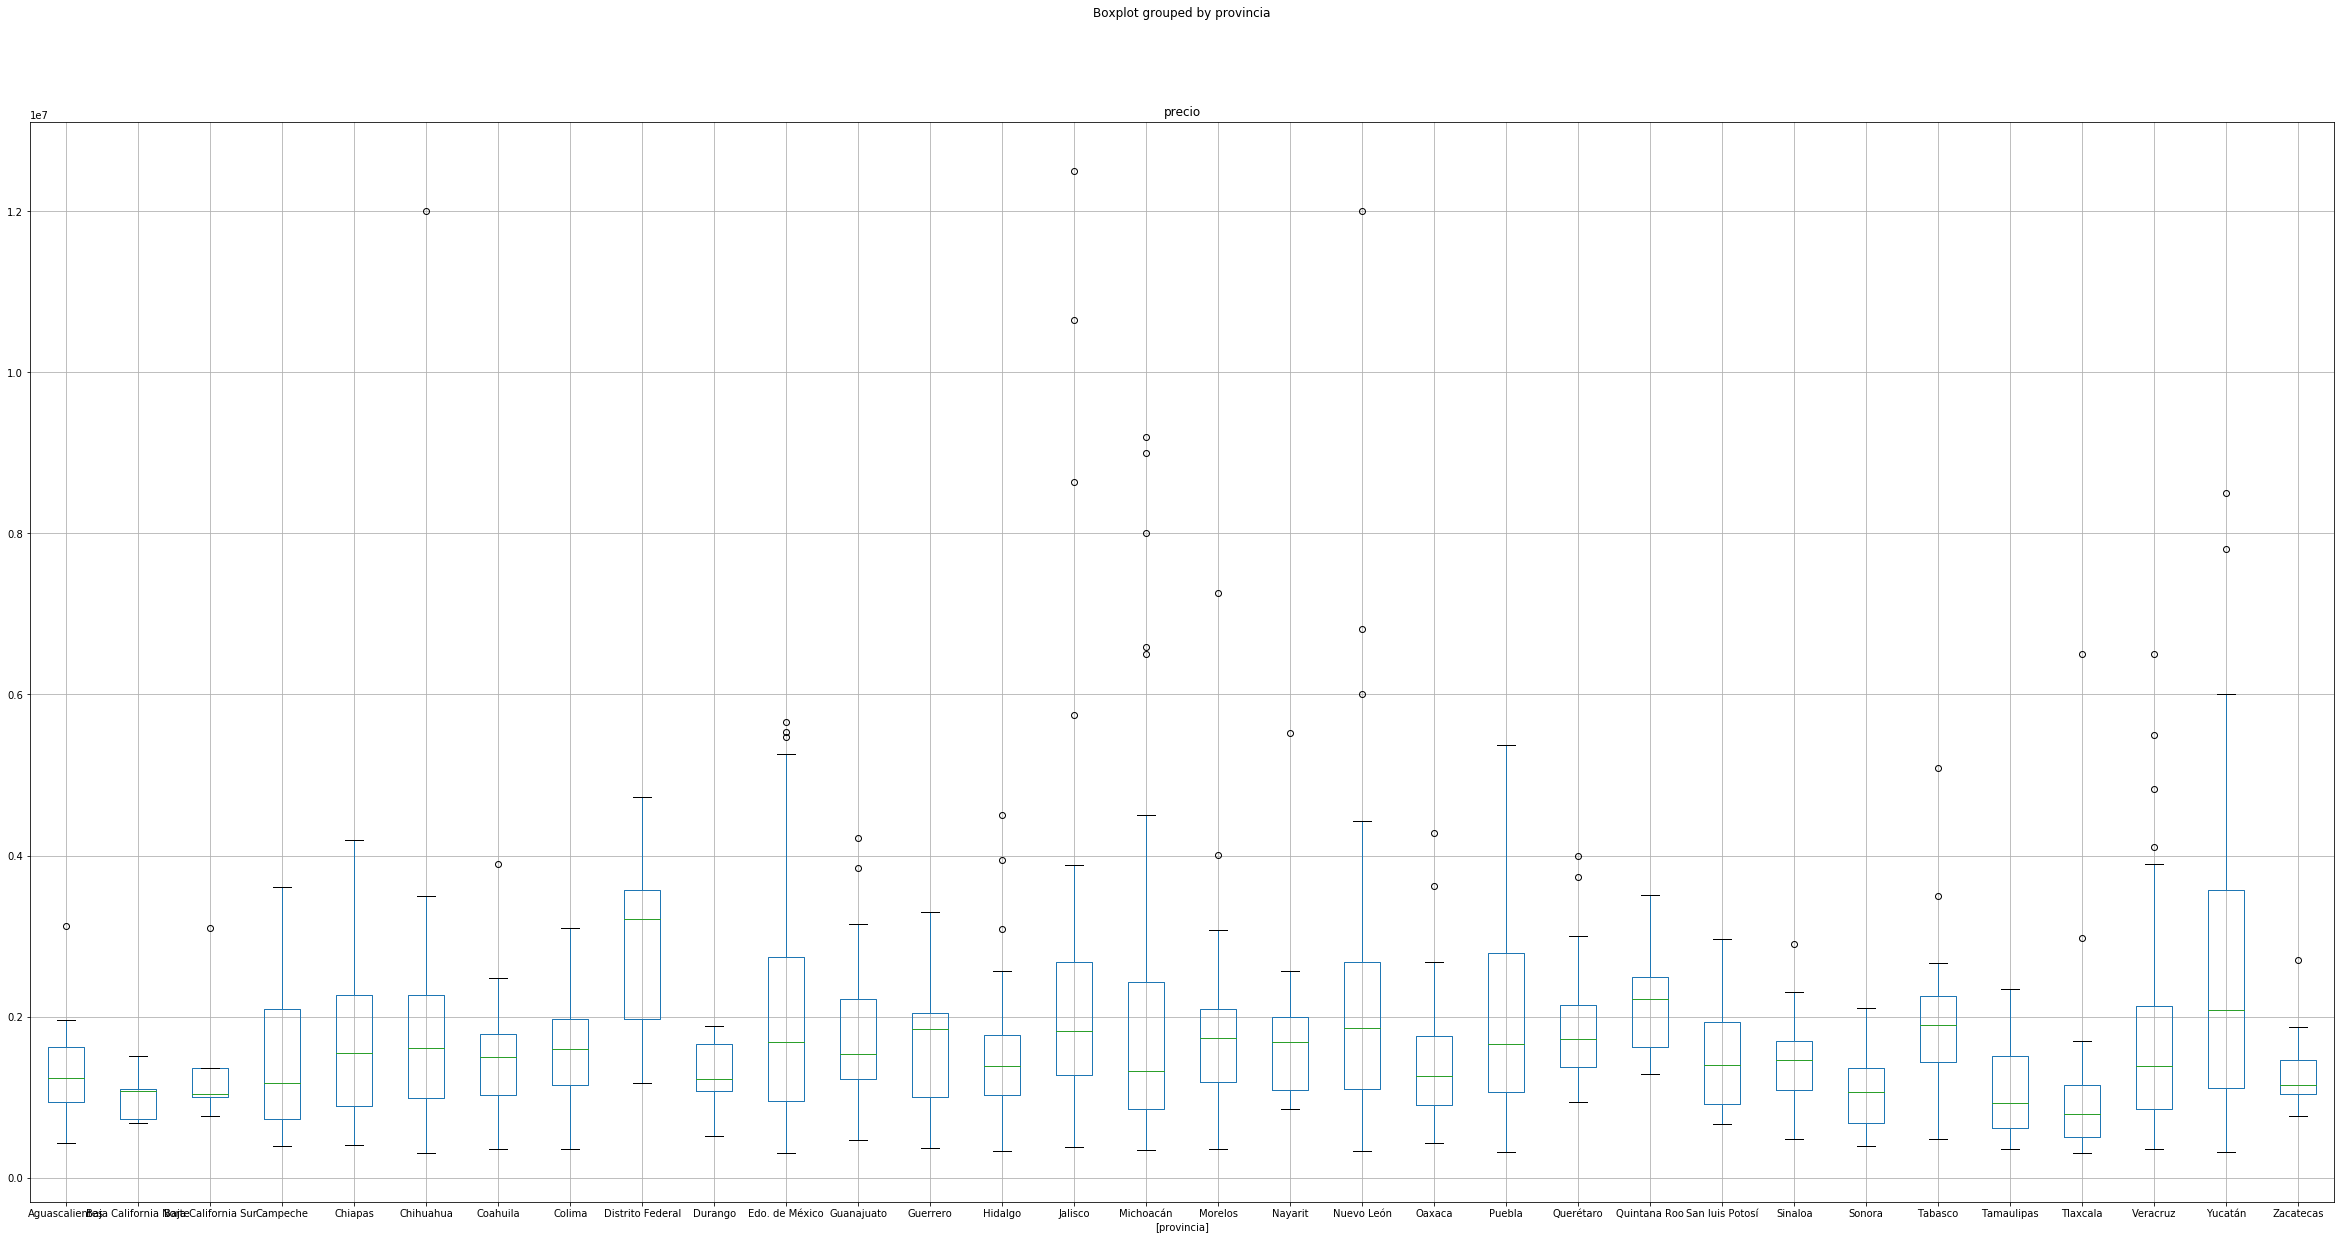

In [207]:
df_ciudades.boxplot(by='provincia',figsize=(40,20))

In [208]:
#se movio arriba
#df_provincias_filtro = df.groupby(['provincia']).agg({'precio':'mean'}).reset_index().sort_values(by='precio').iloc[-10:]['provincia']
#df_precios_maximos = df_ciudades.merge(right=df_provincias_filtro,how='inner',left_on='provincia',right_on='provincia')
#df_precios_maximos.boxplot(by='provincia',figsize=(13,7),column='precio')

In [209]:
#se movio arriba
#df_provincias_filtro_minimos = df.groupby(['provincia']).agg({'precio':'mean'}).reset_index().sort_values(by='precio').iloc[:10]['provincia']
#df_precios_minimos = df_ciudades.merge(right=df_provincias_filtro_minimos,how='inner',left_on='provincia',right_on='provincia')
#df_precios_minimos.boxplot(by='provincia',figsize=(15,7),column='precio')

In [210]:
df_direccion_repetida = df.groupby(['direccion']).agg({'cantidad':'sum'}).reset_index().sort_values(by='cantidad')
df_direccion_repetida = df_direccion_repetida.loc[df_direccion_repetida['cantidad']> 1]
df_repetidas = df.merge(right=df_direccion_repetida,how='inner',left_on='direccion',right_on='direccion')\
[{'id','titulo','descripcion','tipodepropiedad','direccion','ciudad','provincia','antiguedad',\
'habitaciones','garages','banos','metroscubiertos','metrostotales','idzona','lat','lng','fecha',\
'gimnasio','usosmultiples','piscina','precio'}]
df_repetidas['cantidad'] = 1

In [211]:
df_repetidas_idzona = df_repetidas.groupby(['idzona']).agg({'cantidad':'sum'}).reset_index().sort_values(by='cantidad')
df_repetidas_idzona = df_repetidas_idzona.loc[df_repetidas_idzona['cantidad'] > 1]
df_repetidas_idzona = df.merge(right=df_repetidas_idzona,how='inner',left_on='idzona',right_on='idzona')\
[{'id','titulo','descripcion','tipodepropiedad','direccion','ciudad','provincia',\
'habitaciones','garages','banos','idzona','lat','lng','fecha',\
'gimnasio','usosmultiples','piscina','precio','anio_publicacion'}]

In [212]:
df_repetidas_idzona = df_repetidas_idzona.loc[df_repetidas_idzona['lat'] > 14.40 ]
df_repetidas_idzona = df_repetidas_idzona.loc[df_repetidas_idzona['lat'] < 32.80 ]
df_repetidas_idzona = df_repetidas_idzona.loc[df_repetidas_idzona['lng'] < -86.50 ]
df_repetidas_idzona = df_repetidas_idzona.loc[df_repetidas_idzona['lng'] > -117.50 ]
df_repetidas_idzona['idzona'].value_counts()
#df_repetidas_idzona.plot(kind='scatter',x='idzona',y='precio',colormap='jet',figsize=(11,8),alpha=0.7)

50003995.0    1535
50003997.0     821
50003998.0     782
84312.0        772
275358.0       644
              ... 
87974.0          1
113357.0         1
41806.0          1
17296.0          1
25627.0          1
Name: idzona, Length: 4698, dtype: int64